In [1]:
%matplotlib inline
import numpy as np
import math
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from self_functions import *

In [2]:
# 定义矩阵 D: D is the incidence matrix(关联矩阵), row:7 agents, colomn:7 edges
D = np.array([
    [1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    # agent 1
    [0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    # agent 2
    [-1, 0,  0, -1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0],    # agent 3
    [0, -1,  0,  0, -1,  0, -1,  0,  1,  0,  0,  1,  1,  0,  0,  0],    # agent 4
    [0,  0, -1,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  1,  1,  0],    # agent 5
    [0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  1],    # agent 6
    [0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1]     # agent 7
])

In [3]:
# 维度 d: dimension is 3, agents moves in 3-dimensional world
d = 3

# 获取矩阵 D 的大小: n is num of agents, m is num of edges
n, m = D.shape

# 定义 r 矩阵: r is the initial positions of the agents
r = np.array([
    [math.sqrt(3),  1,  0],
    [math.sqrt(3), -1,  0],
    [0,  0,  2],
    [0,  math.sqrt(3),  -1],
    [0, -math.sqrt(3),  -1],
    [-math.sqrt(3),  1,  0],
    [-math.sqrt(3), -1,  0]
])
print("r: \n", r)

# 通过关联矩阵 D 求取边集 edges
edges = get_edges_from_incidence_matrix(D)
print("edges: \n", edges)

r: 
 [[ 1.73205081  1.          0.        ]
 [ 1.73205081 -1.          0.        ]
 [ 0.          0.          2.        ]
 [ 0.          1.73205081 -1.        ]
 [ 0.         -1.73205081 -1.        ]
 [-1.73205081  1.          0.        ]
 [-1.73205081 -1.          0.        ]]
edges: 
 [[1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]
 [3 6]
 [3 7]
 [4 6]
 [4 7]
 [5 7]
 [5 7]
 [6 7]]


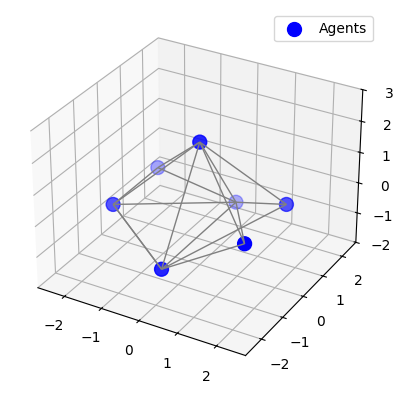

In [4]:
plot_3d_formation(r, edges)

In [5]:
# 生成权重矩阵 W, Wf, Wfl, Wff
W, Wf, Wfl, Wff = generate_weight_matrix_3D(r, edges)
W

array([[[[ 1.30843223e-01, -2.26627109e-01, -6.74457630e-01],
         [ 1.45328546e-01,  2.96093961e-01, -1.02081131e-16],
         [ 6.65401891e-02, -2.74313206e-01, -1.89345857e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[-4.33012702e-01, -2.50000000e-01,  5.00000000e-01],
         [ 3.53553391e-01, -6.12372436e-01,  6.99248466e-17],
         [ 4.33012702e-01,  2.50000000e-01,  5.00000000e-01]],

        [[ 0.00000000e+00, -5.55111512e-17,  0.00000000e+00],
         [ 5.55111512e-17,  0.00000000e+00,  2.77555756e-17],
         [-4.06141547e-01,  1.71655615e-01,  8.29118426e-01]],

        [[ 3.02169479e-01,  4.76627109e-01,  1.74457630e-01],
         [-4.98881937e-01,  3.16278474e-01,  4.40070856e-18],
         [-9.34113443e-02, -1.47342409e-01,  5.64340142e-01]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]

In [ ]:
# 检验 W 矩阵是否正确，理论上 Wr = 0
sum = np.zeros((n, 3))
for i in range(n):
    for j in range(n):
        sum[i] += W[i, j] @ r[j]
print("sum: \n", sum)

sum: 
 [[-1.11022302e-16 -1.11022302e-16 -2.22044605e-16]
 [ 0.00000000e+00  2.22044605e-16 -2.22044605e-16]
 [-4.44089210e-16  0.00000000e+00  0.00000000e+00]
 [-1.33226763e-15 -6.66133815e-16 -4.44089210e-16]
 [-1.00000000e+00 -1.77635684e-15  0.00000000e+00]
 [-2.22044605e-16 -4.44089210e-16 -1.66533454e-16]
 [-1.00000000e+00  5.55111512e-16 -9.99200722e-16]]


In [20]:
# trajectory
# Define via points
via = np.array([
    [0, 0, 0],          # 编队中心点位置
    [5, 0, 0],
    [10, 0, 0],
    [10, -10, 0],
    [10, -20, 0],
    [5, -20, 0],
    [0, -20, 0],
    [0, -10, 0],
    [0, 0, 0]
])

# Define Rotation
rot = [
    [[0, 0, 1], 0],      # 旋转轴，旋转角度
    [[0, 0, 1], 0],
    [[0, 0, 1], -math.pi / 2],
    [[0, 0, 1], 0],
    [[0, 0, 1], -math.pi / 2],
    [[0, 0, 1], -math.pi / 2],
    [[0, 0, 1], 0],
    [[0, 0, 1], 0],
    [[0, 0, 1], -math.pi / 2]
]

# Define Scale
sca = np.array([
    [1, 1, 1],          # x、y、z 缩放比例
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Initialize variables
ra = np.zeros((n, 3, via.shape[0])) # (agents num, dimension, via points num)
qvia = np.zeros((via.shape[0], 15))  # (via points num, translation(3) + rotation(9) + scale(3))

for j in range(via.shape[0]):
    # if j % 2 != 0:
    #     if j == 3 or j == 7:
    #         T1 = np.diag([2, 1])
    #     else:
    #         T1 = np.diag([1, 0.5])
    # else:
    #     T1 = np.eye(2)

    # T2 = rot2(-np.pi / 2 * np.floor((j - 1) / 2))  # Rotate every two steps
    # ra[:, :, j] = r @ T2.transpose() @ T1.transpose() + via[j, :]
    # T = np.dot(T1, T2)
    # qvia[j, :] = np.concatenate((T.flatten(), via[j, :]))
    translation = via[j, :]
    rotation = R.from_rotvec(rot[j][1] * np.array(rot[j][0])).as_matrix()
    scale = sca[j]
    qvia[j, :] = np.concatenate([translation, rotation.flatten(), scale])
    

# Generate trajectory
qr,dqr,ddqr,tr = mstraj_(qvia, 0.03, 0.2)

# Print results
# print("Generated trajectory qr:")
# print(qr)
# print("Time sequence tr:")
# print(tr)

In [21]:
# 初始化
p_0 = r             # 初始位置，向量表示 (7, 3)
pF_0 = r[:n-2, :]   # 跟随者初始位置，向量表示 (5, 3)
pL_0 = r[n-2:]      # 领导者初始位置，向量表示 (2, 3)
v_0 = np.zeros((n, 3))      # 初始速度，向量表示 (7, 3)
vF_0 = np.zeros((n-2, 3))   # 跟随者初始速度，向量表示 (5, 3)
vL_0 = np.zeros((2, 3))     # 领导者初始速度，向量表示 (2, 3)

p_t = p_0
pF_t = pF_0
pL_t = pL_0
v_t = v_0
vF_t = vF_0
vL_t = vL_0

# 参数设定
t = 0
dt = 0.5
loop = 0
aL = 1  # 领导者控制参数
aF = 0.4  # 跟随者控制参数


# x_t = r     # 初始位置
# p_t = x_t.flatten().reshape(-1, 1)  # 初始位置，列向量表示
# pF_t = x_t[:d*(n-2), :]
# pL_t = p_t[d*(n-2):, :]
# v_t = np.zeros((n, 2))  # 初始速度
# u_t = v_t.flatten().reshape(-1, 1)  # 初始速度，列向量表示

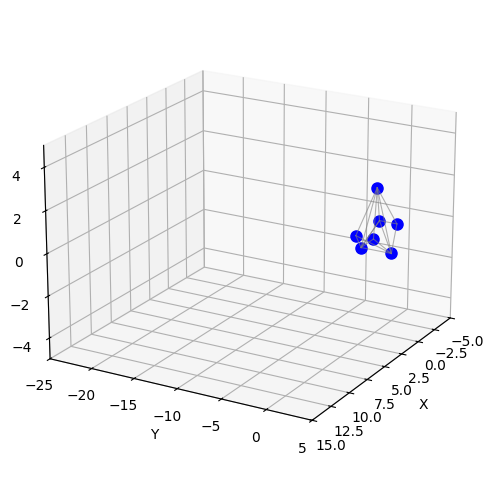

In [35]:
# 创建图形和三维轴
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5, 15)
ax.set_ylim(-25, 5)
ax.set_zlim(-5, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)  # 设置初始视角

# 创建初始的散点图和线条
points, = ax.plot([], [], [], 'o', markersize=8, color='blue')  # 初始为空，将在init函数中设置
lines = []
for j, k in edges:
    line, = ax.plot([], [], [], color='gray', lw=0.8, alpha=0.6)
    lines.append(line)

# 动画初始化函数
def init():
    # 设置初始位置
    points.set_data(p_0[:,0], p_0[:,1])
    points.set_3d_properties(p_0[:,2])
    for m, (j, k) in enumerate(edges):
        lines[m].set_data([p_0[j-1, 0], p_0[k-1, 0]], [p_0[j-1, 1], p_0[k-1, 1]])
        lines[m].set_3d_properties([p_0[j-1, 2], p_0[k-1, 2]])
    return (points,) + tuple(lines)

# 动画更新函数
def update(frame):
    global p_t, pF_t, pL_t, v_t, vF_t, vL_t, loop, t, dt, aL, aF
    # loop 时的目标控制
    translation = qr[loop, :3]
    rotation = qr[loop, 3:12].reshape(3, 3)
    scale = np.diag(qr[loop, 12:])

    # 领导者位置的目标位置
    pL_target = scale @ rotation @ pL_0.T + translation.reshape(3, 1)   # (3, 2)
    
    # 领导者速度的目标速度
    for i in range(2):
        vL_t[i] = aL * [np.tanh(pL_target[0, i] - pL_t[i, 0]), np.tanh(pL_target[1, i] - pL_t[i, 1]), np.tanh(pL_target[2, i] - pL_t[i, 2])]

    # 跟随者位置的目标位置
    pF_target = scale @ rotation @ pF_0.T + translation.reshape(3, 1)   # (3, 5)
    
    # 跟随者位置的目标速度
    for i in range(n-2):
        sum = np.zeros(3)
        gamma = abs(np.linalg.det(Wf[i, i]))
        for j in range(n-2):
            sum += Wf[i, j] @ ((pF_t[j] - pF_t[i]) - vF_t[j])
        vF_t[i] = aF * sum / gamma
    
    # 所有 agent 的位置和速度
    v_t = np.concatenate((vF_t, vL_t), axis=0)
    p_t += v_t * dt
    pF_t = p_t[:n-2, :]
    pL_t = p_t[n-2:, :]

    # 更新散点位置
    points.set_data(p_t[:,0], p_t[:,1])
    points.set_3d_properties(p_t[:,2])
    # 更新线条位置
    for m, (j, k) in enumerate(edges):
        lines[m].set_data([p_t[j-1, 0], p_t[k-1, 0]], [p_t[j-1, 1], p_t[k-1, 1]])
        lines[m].set_3d_properties([p_t[j-1, 2], p_t[k-1, 2]])
    
    # 更新时间
    t += dt
    loop += 1
    
    return (points,) + tuple(lines)

# 创建动画
ani = animation.FuncAnimation(
    fig, update,
    frames=int(qr.shape[0]),
    init_func=init,
    blit=True,
    interval=10
)

plt.show()

In [32]:
print(Wf[3, 4].shape)
print((pF_t[4] - pF_t[3]).shape)
print(vF_t[4].shape)
print(((pF_t[4] - pF_t[3]) - vF_t[4]).reshape(3, 1).shape)
Wf[3, 4] @ ((pF_t[4] - pF_t[3]) - vF_t[4])

(3, 3)
(3,)
(3,)
(3, 1)


array([3.26923077, 0.        , 0.8660254 ])